In [6]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 68.9 MB/s eta 0:00:00


In [7]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

# The Antarctic continent and the Southern Ocean starting from 60°S

#### This map shows the Antarctic continent and the Southern Ocean starting from 60 degrees South. An orthographic map projection was chosen, as this one is less "flat" and shows the curvature of the globe more clearly than say, the PlateCarree. For a projection of Antarctica this is particularly important because otherwise the continent just appears as a long and elongated island. The degrees South were chosen as instructed, and in order to keep the frame even, the extent -180, 180, -90, and -60 was chosen to fit the continent nicely in the center.

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


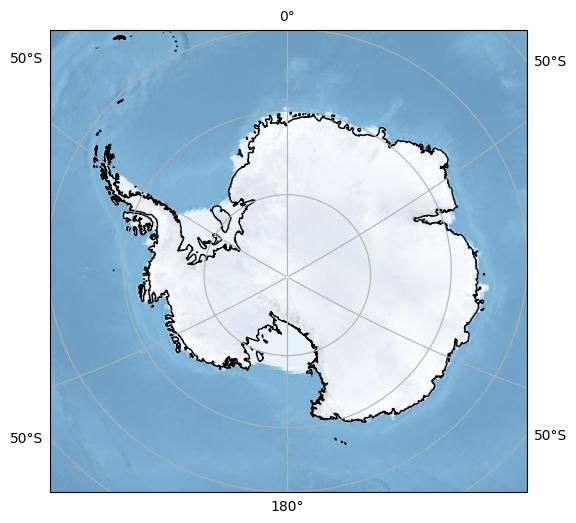

In [8]:
#P3 Map 1
extent = [-180, 180, -90, -60]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))
ax.coastlines(resolution='10m')
ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.stock_img()
ax.add_feature(cfeature.OCEAN)
ax.gridlines(draw_labels=True)
plt.show()

# The South Atlantic, from 20°S to 50°S. The map should show the following locations: Walvis Bay, Cape Town, Rio de Janeiro, Montevideo

#### This map shows the South Atlantic, including three cities: Walvis Bay, Cape Town, Rio de Janeiro, and Montevideo. Each city was color coded and a label was added. Colors were chosen from Matplotlib's color command database. A legend was added, and the path from Rio de Janeiro to Walvis bay was plotted to experiment with different visualizations. The PlateCarree map was appropriate in this case, as the continents are less skewed than the previous map of Antarctica for example (the farther south  the more distorted), and the scale is larger. Platecarree also requires less computing power and is good for simple visualization. As can be seen in the first map, I tested the Lambert projection and it did not suit the required coordinates of 20 and 50 S nicely. On a different S range, it might have been a good map to use.

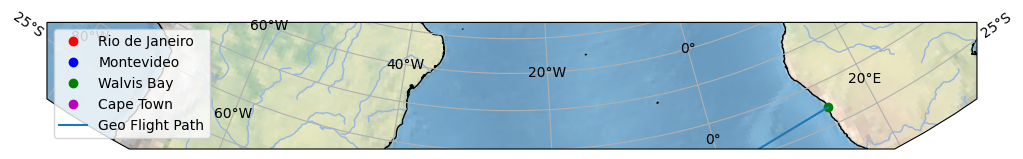

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Defining extents (for Lambert projection testing)
extent = [-80, 30, -50, -20]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

# NOT PART OF ASSIGNMENT - TESTING the Lambert Conformal projection
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=central_lon, central_latitude=central_lat))

#  map extent
ax.set_extent(extent, crs=ccrs.PlateCarree())

ax.stock_img()
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)

ax.plot([-43], [-23], 'ro', label="Rio de Janeiro", transform=ccrs.PlateCarree())
ax.plot([-56], [-35], 'bo', label="Montevideo", transform=ccrs.PlateCarree())
ax.plot([14.5], [-23], 'go', label="Walvis Bay", transform=ccrs.PlateCarree())
ax.plot([18.42], [-34], 'mo', label="Cape Town", transform=ccrs.PlateCarree())  # Corrected coords

# Flight path (extra visualization)
ax.plot([-43, 14.5], [-23, -23], transform=ccrs.Geodetic(), label="Geo Flight Path")

plt.legend()

plt.show()


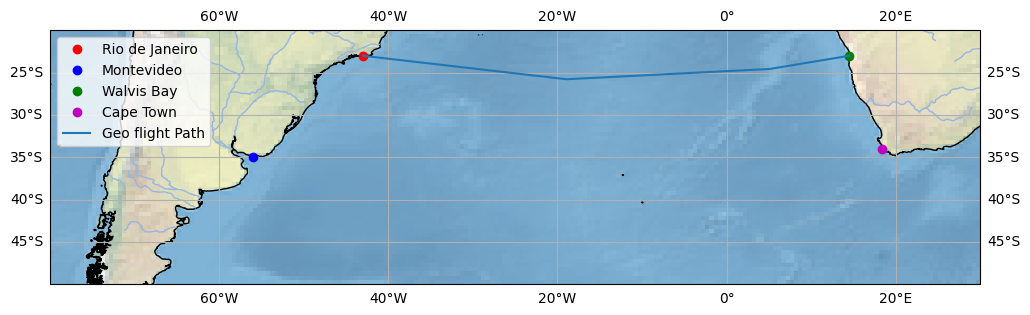

In [12]:
#P3 QUESTION 2 MAP -- FINAL MAP FOR ASSIGNMENT!
extent = [-80, 30, -20, -50]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.stock_img()
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)

ax.plot([-43],[-23], 'ro', label="Rio de Janeiro ") #Rio
ax.plot([-56],[-35], 'bo', label="Montevideo") #Monte 	-56.1645	-34.9011
ax.plot([14.5],[-23], 'go', label="Walvis Bay") #Walvis
ax.plot([18.4],[-34], 'mo', label="Cape Town") #Cape Town

ax.plot([-43, 14.5],[-23, -23], transform=ccrs.Geodetic(), label="Geo flight Path") #Rio

plt.legend()

plt.show()

#A series of 3 panels showing the use of different coastline resolutions from the GSHHG database in a map of False Bay. Display the coarse, intermediate and full resolution.


#### This map shows three projections at different resolutions. As we learned, there are five resolutions that can be used from the GSHHG database: full, high, intermediate, low, coarse. I added a title for each resolution mapped (full, intermediate, and coarse, in descending order).

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://www.ngdc.noaa.gov/mgg/shorelines/data/gshhs/latest/gshhg-shp-2.3.7.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


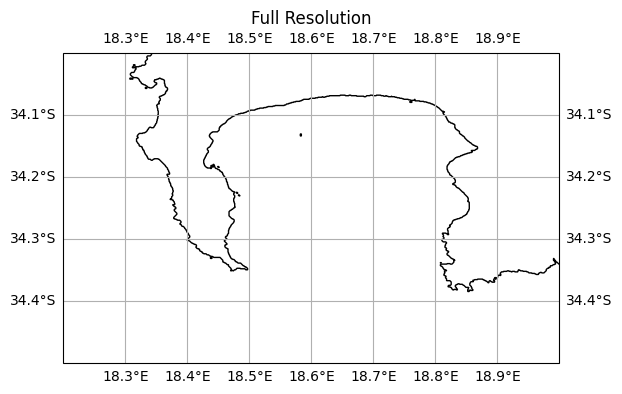

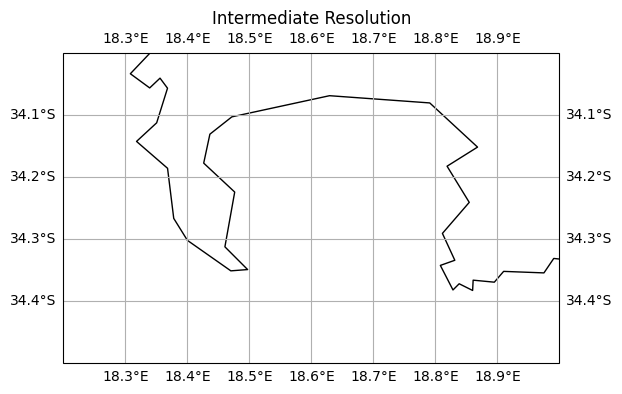

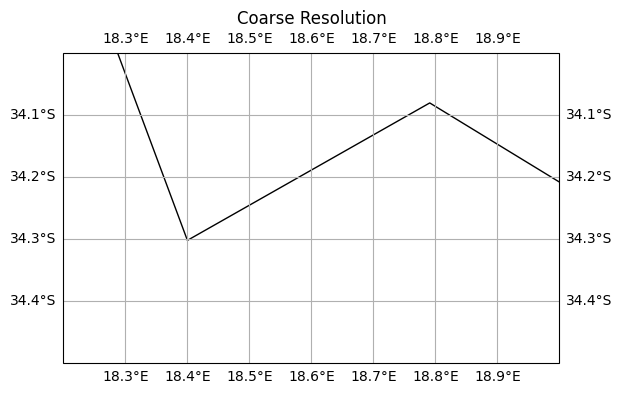

In [ ]:
TITLES = {
    "f": "Full Resolution",
    "i": "Intermediate Resolution",
    "c": "Coarse Resolution"

}
resolutions = ["f","i","c"]
for res in resolutions:
    plt.figure()
    cl_high = cfeature.GSHHSFeature(scale=res)
    extent = [18.2, 19, -34.5, -34]
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent(extent)
    ax.add_feature(cl_high)
    ax.gridlines(draw_labels=True)
    ax.set_title(TITLES[res])

plt.show()